
<span style="color: #00857e; font-family: Segoe UI; font-size: 1.8em; font-weight: 300;">MMDetection+CascadeRCNN+Weight</span>


<span style="color: #E45D00; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">📐 Setup MMDetection</span>

In [1]:
%%bash
# Check nvcc version
nvcc -V
echo
# Check GCC version
gcc --version
echo
# Check the version of torch and cuda packages
pip list | grep "torch\|cuda"

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0

gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.


cupy-cuda110                   8.6.0
jaxlib                         0.1.64+cuda110
nnabla-ext-cuda110             1.19.0
pycuda                         2021.1
pytorch-ignite                 0.4.4
pytorch-lightning              1.2.8
torch                          1.7.0
torchaudio                     0.7.0a0+ac17b64
torchmetrics                   0.2.0
torchtext                      0.8.0a0+cd6902d
torchvision                    0.8.1


In [2]:
!pip install mmcv-full==1.3.8 -f https://download.openmmlab.com/mmcv/dist/cu110/torch1.7.0/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu110/torch1.7.0/index.html
     |████████████████████████████████| 31.2 MB 8.7 MB/s 
     |████████████████████████████████| 185 kB 834 kB/s 


In [3]:
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection && pip install -e .

!pip install Pillow==7.0.0

Cloning into 'mmdetection'...
remote: Enumerating objects: 19427, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 19427 (delta 8), reused 6 (delta 0), pack-reused 19392
Receiving objects: 100% (19427/19427), 23.79 MiB | 22.04 MiB/s, done.
Resolving deltas: 100% (13535/13535), done.
Obtaining file:///kaggle/working/mmdetection
  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-install-gtpayhao/panopticapi_57d5f7898dd14669aa7d15cfd812e555
  Running command git clone -q https://github.com/cocodataset/panopticapi.git /tmp/pip-install-gtpayhao/panopticapi_57d5f7898dd14669aa7d15cfd812e555
  Created wheel for panopticapi: filename=panopticapi-0.1-py3-none-any.whl size=8318 sha256=464e1c9e577796b6f33f8a17a3604d7f65f1d5c2bcb7c454beb60b0bf9496745
  Stored in directory: /tmp/pip-ephem-wheel-cache-wnl7qx0b/wheels/ad/89/b8/b66cce9246af3d71d65d72c85ab993fd28e7578e1b0ed197f1
  Created wheel for pycocotools: filename=

<span style="color: #E45D00; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Setup Weights & Biases</span>

In [4]:
!pip install wandb --upgrade

     |████████████████████████████████| 1.8 MB 837 kB/s 
     |████████████████████████████████| 138 kB 4.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.4
    Uninstalling urllib3-1.26.4:
      Successfully uninstalled urllib3-1.26.4
  Attempting uninstall: wandb
    Found existing installation: wandb 0.10.26
    Uninstalling wandb-0.10.26:
      Successfully uninstalled wandb-0.10.26
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab-git 0.11.0 requires nbdime<2.0.0,>=1.1.0, but you have nbdime 2.1.0 which is incompatible.
earthengine-api 0.1.261 requires google-api-python-client<2,>=1.12.1, but you have google-api-python-client 1.8.0 which is incompatible.
allennlp 2.3.0 requires wandb<0.11.0,>=0.10.0, but you have wandb 0.11.0 which is incompatible.
aiobotocore 1.3.0 requires botocore<1.20.50,>=1.20.49, but you 

In [5]:
import wandb
from kaggle_secrets import UserSecretsClient

user_secrets = UserSecretsClient()

# I have saved my API token with "wandb_api" as Label. 
# If you use some other Label make sure to change the same below. 
wandb_key = user_secrets.get_secret("wandb_key") 

wandb.login(key=wandb_key)

wandb: W&B API key is configured (use `wandb login --relogin` to force relogin)
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publically.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

<span style="color: #E45D00; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Imports and Seed Everything</span>

In [6]:
import sys
sys.path.insert(0, "./mmdetection")

import os
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

# Check MMDetection installation
from mmdet.apis import set_random_seed

# Imports
import mmdet
from mmdet.apis import set_random_seed
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

import random
import numpy as np
from pathlib import Path

1.7.0 True
11.0
GCC 7.3


In [7]:
global_seed = 111

def set_seed(seed=global_seed):
    """Sets the random seeds."""
    set_random_seed(seed, deterministic=False)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ['PYTHONHASHSEED'] = str(seed)
    
set_seed()

<span style="color: #E45D00; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">🔨 Prepare the MMDetection Config</span>

In [8]:
from mmcv import Config

# cfg = Config.fromfile('/kaggle/working/mmdetection/configs/vfnet/vfnet_r50_fpn_mdconv_c3-c5_mstrain_2x_coco.py')
# cfg = Config.fromfile("/kaggle/working/mmdetection/configs/vfnet/vfnet_r50_fpn_mstrain_2x_coco.py")
# cfg = Config.fromfile("/kaggle/working/mmdetection/configs/gfl/gfl_r50_fpn_mstrain_2x_coco.py")
# baseline_cfg_path = "/kaggle/working/mmdetection/configs/cascade_rcnn/cascade_rcnn_r50_fpn_20e_coco.py"
baseline_cfg_path = "/kaggle/working/mmdetection/configs/cascade_rcnn/cascade_rcnn_x101_32x4d_fpn_1x_coco.py"
cfg = Config.fromfile(baseline_cfg_path)

<span style="color: #000508; font-family: Segoe UI; font-size: 1.6em; font-weight: 300;">General Training Settings</span>


In [9]:
# model_name = 'vfnet_r50_fpn'
# model_name = 'cascade_rcnn_r50_fpn'
model_name = 'cascade_rcnn_x101_32x4d_fpn_1x'
fold = 4
job = 4

# Folder to store model logs and weight files
job_folder = f'/kaggle/working/job{job}_{model_name}_fold{fold}'
cfg.work_dir = job_folder

# Change the wnd username and project name below
wnb_username = 'liortoledano'
wnb_project_name = 'COVID19 - MMDetection+CascadeRCNN'

# Set seed thus the results are more reproducible
cfg.seed = global_seed

if not os.path.exists(job_folder):
    os.makedirs(job_folder)

print("Job folder:", job_folder)

Job folder: /kaggle/working/job4_cascade_rcnn_x101_32x4d_fpn_1x_fold4


In [10]:
# Set the number of classes
for head in cfg.model.roi_head.bbox_head:
    head.num_classes = 1
# cfg.model.roi_head.bbox_head.num_classes = 1
# cfg.model.bbox_head.num_classes = 1

# cfg.gpu_ids = range(1)
cfg.gpu_ids = [0]

# Setting pretrained model in the init_cfg which is required 
# for transfer learning as per the latest MMdetection update
cfg.model.backbone.init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')
cfg.model.backbone.init_cfg=dict(type='Pretrained', checkpoint='open-mmlab://resnext101_32x4d')
cfg.model.pop('pretrained', None)

cfg.runner.max_epochs = 12 # Epochs for the runner that runs the workflow 
cfg.total_epochs = 12

# Learning rate of optimizers. The LR is divided by 8 since the config file is originally for 8 GPUs
cfg.optimizer.lr = 0.02/8

## Learning rate scheduler config used to register LrUpdater hook
cfg.lr_config = dict(
    policy='CosineAnnealing', # The policy of scheduler, also support CosineAnnealing, Cyclic, etc. Refer to details of supported LrUpdater from https://github.com/open-mmlab/mmcv/blob/master/mmcv/runner/hooks/lr_updater.py#L9.
    by_epoch=False,
    warmup='linear', # The warmup policy, also support `exp` and `constant`.
    warmup_iters=500, # The number of iterations for warmup
    warmup_ratio=0.001, # The ratio of the starting learning rate used for warmup
    min_lr=1e-07)

# config to register logger hook
cfg.log_config.interval = 20 # Interval to print the log

# Config to set the checkpoint hook, Refer to https://github.com/open-mmlab/mmcv/blob/master/mmcv/runner/hooks/checkpoint.py for implementation.
cfg.checkpoint_config.interval = 1 # The save interval is 1

<span style="color: #000508; font-family: Segoe UI; font-size: 1.6em; font-weight: 300;">Configure Datasets for Training and Evaluation</span>

In [11]:
cfg.dataset_type = 'CocoDataset' # Dataset type, this will be used to define the dataset
cfg.classes = ("Covid_Abnormality",)

cfg.data.train.img_prefix = '/kaggle/input/siim-covid19-512-images-and-metadata/train' # Prefix of image path
cfg.data.train.classes = cfg.classes
cfg.data.train.ann_file = f'/kaggle/input/siim-covid19-coco-512x512-groupkfold/train_annotations_fold{fold}.json'
cfg.data.train.type='CocoDataset'

cfg.data.val.img_prefix = '/kaggle/input/siim-covid19-512-images-and-metadata/train' # Prefix of image path
cfg.data.val.classes = cfg.classes
cfg.data.val.ann_file = f'/kaggle/input/siim-covid19-coco-512x512-groupkfold/val_annotations_fold{fold}.json'
cfg.data.val.type='CocoDataset'

cfg.data.test.img_prefix = '/kaggle/input/siim-covid19-512-images-and-metadata/train' # Prefix of image path
cfg.data.test.classes = cfg.classes
cfg.data.test.ann_file =  f'/kaggle/input/siim-covid19-coco-512x512-groupkfold/val_annotations_fold{fold}.json'
cfg.data.test.type='CocoDataset'

cfg.data.samples_per_gpu = 4 # Batch size of a single GPU used in testing
cfg.data.workers_per_gpu = 2 # Worker to pre-fetch data for each single GPU

<span style="color: #000508; font-family: Segoe UI; font-size: 1.6em; font-weight: 300;">Setting Metric for Evaluation</span>

In [12]:
# The config to build the evaluation hook, refer to https://github.com/open-mmlab/mmdetection/blob/master/mmdet/core/evaluation/eval_hooks.py#L7 for more details.
cfg.evaluation.metric = 'bbox' # Metrics used during evaluation

# Set the epoch intervel to perform evaluation
cfg.evaluation.interval = 1

# Set the iou threshold of the mAP calculation during evaluation
cfg.evaluation.iou_thrs = [0.5]

# cfg.evaluation.save_best='bbox_mAP_50'

<span style="color: #000508; font-family: Segoe UI; font-size: 1.6em; font-weight: 300;">Prepare the Pre-processing & Augmentation Pipelines</span>

In [13]:
albu_train_transforms = [
    dict(type='ShiftScaleRotate', shift_limit=0.0625,
         scale_limit=0.15, rotate_limit=15, p=0.4),
    dict(type='RandomBrightnessContrast', brightness_limit=0.2,
         contrast_limit=0.2, p=0.5),
    dict(type='IAAAffine', shear=(-10.0, 10.0), p=0.4),
#     dict(type='MixUp', p=0.2, lambd=0.5),
    dict(type="Blur", p=1.0, blur_limit=7),
    dict(type='CLAHE', p=0.5),
    dict(type='Equalize', mode='cv', p=0.4),
    dict(
        type="OneOf",
        transforms=[
            dict(type="GaussianBlur", p=1.0, blur_limit=7),
            dict(type="MedianBlur", p=1.0, blur_limit=7),
        ],
        p=0.4,
    ),
    ]


cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations', with_bbox=True, with_mask=True),
    dict(type='Resize', img_scale=(1333, 800), keep_ratio=True),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(
        type='Albu',
        transforms=albu_train_transforms,
        bbox_params=dict(
        type='BboxParams',
        format='pascal_voc',
        label_fields=['gt_labels'],
        min_visibility=0.0,
        filter_lost_elements=True),
        keymap=dict(img='image', gt_bboxes='bboxes'),
        update_pad_shape=False,
        skip_img_without_anno=True),
    dict(
        type='Normalize',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        to_rgb=True),
    dict(type='Pad', size_divisor=32),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_bboxes', 'gt_labels', 'gt_masks'])
]
cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(1333, 800),
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(
                type='Normalize',
                mean=[123.675, 116.28, 103.53],
                std=[58.395, 57.12, 57.375],
                to_rgb=True),
            dict(type='Pad', size_divisor=32),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img'])
        ])
]

<span style="color: #000508; font-family: Segoe UI; font-size: 1.6em; font-weight: 300;">Weights & Biases Integration for Experiment Tracking and Logging</span>

In [14]:

# cfg.log_level = 'DEBUG'
cfg.log_config.hooks = [dict(type='TextLoggerHook'),
                        dict(type='WandbLoggerHook',
                             init_kwargs=dict(project=wnb_project_name,
                                              name=f'exp-{model_name}-fold{fold}-job{job}',
                                              entity=wnb_username))
                       ]

<span style="color: #000508; font-family: Segoe UI; font-size: 1.6em; font-weight: 300;">Save Config File</span>

In [15]:
cfg_path = f'{job_folder}/job{job}_{Path(baseline_cfg_path).name}'
print(cfg_path)

# Save config file for inference later
cfg.dump(cfg_path)
print(f'Config:\n{cfg.pretty_text}')

/kaggle/working/job4_cascade_rcnn_x101_32x4d_fpn_1x_fold4/job4_cascade_rcnn_x101_32x4d_fpn_1x_coco.py
Config:
model = dict(
    type='CascadeRCNN',
    backbone=dict(
        type='ResNeXt',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(
            type='Pretrained', checkpoint='open-mmlab://resnext101_32x4d'),
        groups=32,
        base_width=4),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            

<span style="color: #E45D00; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">🚀 Build Dataset and Start Training</span>

In [16]:
model = build_detector(cfg.model,
                       train_cfg=cfg.get('train_cfg'),
                       test_cfg=cfg.get('test_cfg'))
model.init_weights()

./mmdetection/mmdet/core/anchor/builder.py:16: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
2021-07-21 08:48:43,920 - mmcv - INFO - load model from: open-mmlab://resnext101_32x4d
2021-07-21 08:48:43,921 - mmcv - INFO - Use load_from_openmmlab loader
Downloading: "https://download.openmmlab.com/pretrain/third_party/resnext101_32x4d-a5af3160.pth" to /root/.cache/torch/hub/checkpoints/resnext101_32x4d-a5af3160.pth


  0%|          | 0.00/161M [00:00<?, ?B/s]

In [17]:
datasets = [build_dataset(cfg.data.train)]

loading annotations into memory...
Done (t=0.09s)
creating index...
index created!


<span style="font-size: 1.3em; font-weight: 300;">📌 Visit the Run page link in the cell below Ex: "https://wandb.ai/sreevishnu-damodaran/siim-covid19-1/runs/<run-id\>" as soon as the training starts to see the metrics live seamlessly in the Weights & Biases Dashboard.</span>
    
<span style="font-size: 1.3em; font-weight: 300;">The projects page <a href="https://wandb.ai/sreevishnu-damodaran/siim-covid19-1">https://wandb.ai/sreevishnu-damodaran/siim-covid19-1</a> compares it with other training jobs.</span>

In [18]:
train_detector(model, datasets[0], cfg, distributed=False, validate=True)

2021-07-21 08:49:07,578 - mmdet - INFO - Start running, host: root@1e89f7d9c10d, work_dir: /kaggle/working/job4_cascade_rcnn_x101_32x4d_fpn_1x_fold4
2021-07-21 08:49:07,580 - mmdet - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) CosineAnnealingLrUpdaterHook       
(NORMAL      ) CheckpointHook                     
(NORMAL      ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
(VERY_LOW    ) WandbLoggerHook                    
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) CosineAnnealingLrUpdaterHook       
(NORMAL      ) EvalHook                           
(NORMAL      ) NumClassCheckHook                  
(LOW         ) IterTimerHook                      
(VERY_LOW    ) TextLoggerHook                     
(VERY_LOW    ) WandbLoggerHook                    
 -------------------- 
before_train_iter:
(VERY_HIGH   ) CosineAnnealingLrUpdaterHook       
(NORMAL      ) EvalHook                           
(LO

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


./mmdetection/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
./mmdetection/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '
2021-07-21 08:49:51,891 - mmdet - INFO - Epoch [1][20/859]	lr: 9.740e-05, eta: 5:23:24, time: 1.886, data_time: 0.129, memory: 8205, loss_rpn_cls: 0.6778, loss_rpn_bbox: 0.0108, s0.loss_cls: 0.1187, s0.acc: 98.7695, s0.loss_bbox: 0.0198, s1.loss_cls: 0.1362, s1.acc: 89.6948, s1.loss_bbox: 0.0089, s2.loss_cls: 0.2275, s2.acc: 46.7188, s2.loss_bbox: 0.0014, loss: 1.2012
2021-07-21 08:50:26,454 - mmdet - INFO - Epoch [1][40/859]	lr: 1.973e-04, eta: 5:09:15, time: 1.728, data_time: 0.011, memory: 8205, loss_rpn_cls: 0.6072, loss_rpn_bbox: 0.0121, s0.loss_cls: 0.0501,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 859/859, 5.8 task/s, elapsed: 147s, ETA:     0s

2021-07-21 09:17:15,721 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-07-21 09:17:16,336 - mmdet - INFO - Epoch(val) [1][859]	bbox_mAP: 0.4050, bbox_mAP_50: -1.0000, bbox_mAP_75: -1.0000, bbox_mAP_s: 0.0000, bbox_mAP_m: 0.1770, bbox_mAP_l: 0.4840, bbox_mAP_copypaste: 0.405 -1.000 -1.000 0.000 0.177 0.484


DONE (t=0.45s).
Accumulating evaluation results...
DONE (t=0.10s).
 Average Precision  (AP) @[ IoU=0.50:0.50 | area=   all | maxDets=100 ] = 0.405
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.50 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.50 | area=medium | maxDets=1000 ] = 0.177
 Average Precision  (AP) @[ IoU=0.50:0.50 | area= large | maxDets=1000 ] = 0.484
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=100 ] = 0.730
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=300 ] = 0.730
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=1000 ] = 0.730
 Average Recall     (AR) @[ IoU=0.50:0.50 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=medium | maxDets=1000 ] = 0.261
 Average Recall     (AR) @[ IoU=0.50:0.50 |

2021-07-21 09:17:54,620 - mmdet - INFO - Epoch [2][20/859]	lr: 2.456e-03, eta: 4:34:44, time: 1.913, data_time: 0.128, memory: 8206, loss_rpn_cls: 0.0208, loss_rpn_bbox: 0.0087, s0.loss_cls: 0.1226, s0.acc: 95.2954, s0.loss_bbox: 0.0964, s1.loss_cls: 0.0580, s1.acc: 95.3784, s1.loss_bbox: 0.0801, s2.loss_cls: 0.0210, s2.acc: 97.2266, s2.loss_bbox: 0.0251, loss: 0.4326
2021-07-21 09:18:30,458 - mmdet - INFO - Epoch [2][40/859]	lr: 2.453e-03, eta: 4:34:18, time: 1.792, data_time: 0.011, memory: 8206, loss_rpn_cls: 0.0219, loss_rpn_bbox: 0.0095, s0.loss_cls: 0.1236, s0.acc: 95.4688, s0.loss_bbox: 0.1021, s1.loss_cls: 0.0596, s1.acc: 95.3516, s1.loss_bbox: 0.0850, s2.loss_cls: 0.0215, s2.acc: 97.2168, s2.loss_bbox: 0.0258, loss: 0.4490
2021-07-21 09:19:06,775 - mmdet - INFO - Epoch [2][60/859]	lr: 2.451e-03, eta: 4:33:57, time: 1.816, data_time: 0.011, memory: 8206, loss_rpn_cls: 0.0164, loss_rpn_bbox: 0.0084, s0.loss_cls: 0.1209, s0.acc: 95.5298, s0.loss_bbox: 0.0958, s1.loss_cls: 0.0570,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 859/859, 5.8 task/s, elapsed: 147s, ETA:     0s

2021-07-21 09:45:39,211 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-07-21 09:45:40,016 - mmdet - INFO - Epoch(val) [2][859]	bbox_mAP: 0.4590, bbox_mAP_50: -1.0000, bbox_mAP_75: -1.0000, bbox_mAP_s: 0.0000, bbox_mAP_m: 0.1670, bbox_mAP_l: 0.5440, bbox_mAP_copypaste: 0.459 -1.000 -1.000 0.000 0.167 0.544


DONE (t=0.42s).
Accumulating evaluation results...
DONE (t=0.11s).
 Average Precision  (AP) @[ IoU=0.50:0.50 | area=   all | maxDets=100 ] = 0.459
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.50 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.50 | area=medium | maxDets=1000 ] = 0.167
 Average Precision  (AP) @[ IoU=0.50:0.50 | area= large | maxDets=1000 ] = 0.544
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=100 ] = 0.777
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=300 ] = 0.777
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=1000 ] = 0.777
 Average Recall     (AR) @[ IoU=0.50:0.50 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=medium | maxDets=1000 ] = 0.350
 Average Recall     (AR) @[ IoU=0.50:0.50 |

2021-07-21 09:46:18,397 - mmdet - INFO - Epoch [3][20/859]	lr: 2.329e-03, eta: 4:11:09, time: 1.918, data_time: 0.125, memory: 8206, loss_rpn_cls: 0.0176, loss_rpn_bbox: 0.0077, s0.loss_cls: 0.1402, s0.acc: 94.7119, s0.loss_bbox: 0.1129, s1.loss_cls: 0.0691, s1.acc: 94.6655, s1.loss_bbox: 0.0978, s2.loss_cls: 0.0253, s2.acc: 96.3965, s2.loss_bbox: 0.0320, loss: 0.5026
2021-07-21 09:46:54,337 - mmdet - INFO - Epoch [3][40/859]	lr: 2.325e-03, eta: 4:10:37, time: 1.797, data_time: 0.011, memory: 8206, loss_rpn_cls: 0.0158, loss_rpn_bbox: 0.0078, s0.loss_cls: 0.1252, s0.acc: 95.2588, s0.loss_bbox: 0.1043, s1.loss_cls: 0.0627, s1.acc: 94.9780, s1.loss_bbox: 0.0994, s2.loss_cls: 0.0243, s2.acc: 96.4038, s2.loss_bbox: 0.0352, loss: 0.4747
2021-07-21 09:47:30,508 - mmdet - INFO - Epoch [3][60/859]	lr: 2.321e-03, eta: 4:10:07, time: 1.809, data_time: 0.012, memory: 8206, loss_rpn_cls: 0.0209, loss_rpn_bbox: 0.0089, s0.loss_cls: 0.1317, s0.acc: 95.2051, s0.loss_bbox: 0.0975, s1.loss_cls: 0.0638,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 859/859, 5.8 task/s, elapsed: 148s, ETA:     0s

2021-07-21 10:14:03,153 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.47s).
Accumulating evaluation results...


2021-07-21 10:14:04,104 - mmdet - INFO - Epoch(val) [3][859]	bbox_mAP: 0.5100, bbox_mAP_50: -1.0000, bbox_mAP_75: -1.0000, bbox_mAP_s: 0.0000, bbox_mAP_m: 0.1690, bbox_mAP_l: 0.5950, bbox_mAP_copypaste: 0.510 -1.000 -1.000 0.000 0.169 0.595


DONE (t=0.41s).
 Average Precision  (AP) @[ IoU=0.50:0.50 | area=   all | maxDets=100 ] = 0.510
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.50 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.50 | area=medium | maxDets=1000 ] = 0.169
 Average Precision  (AP) @[ IoU=0.50:0.50 | area= large | maxDets=1000 ] = 0.595
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=100 ] = 0.792
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=300 ] = 0.792
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=1000 ] = 0.792
 Average Recall     (AR) @[ IoU=0.50:0.50 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=medium | maxDets=1000 ] = 0.451
 Average Recall     (AR) @[ IoU=0.50:0.50 | area= large | maxDets=1000 ] = 0.881


2021-07-21 10:14:42,374 - mmdet - INFO - Epoch [4][20/859]	lr: 2.129e-03, eta: 3:46:23, time: 1.912, data_time: 0.125, memory: 8206, loss_rpn_cls: 0.0150, loss_rpn_bbox: 0.0069, s0.loss_cls: 0.1135, s0.acc: 95.7837, s0.loss_bbox: 0.0837, s1.loss_cls: 0.0618, s1.acc: 95.1392, s1.loss_bbox: 0.0919, s2.loss_cls: 0.0250, s2.acc: 96.1890, s2.loss_bbox: 0.0344, loss: 0.4323
2021-07-21 10:15:18,481 - mmdet - INFO - Epoch [4][40/859]	lr: 2.123e-03, eta: 3:45:50, time: 1.805, data_time: 0.011, memory: 8206, loss_rpn_cls: 0.0162, loss_rpn_bbox: 0.0060, s0.loss_cls: 0.1127, s0.acc: 95.9619, s0.loss_bbox: 0.0817, s1.loss_cls: 0.0564, s1.acc: 95.7178, s1.loss_bbox: 0.0807, s2.loss_cls: 0.0213, s2.acc: 96.9409, s2.loss_bbox: 0.0287, loss: 0.4036
2021-07-21 10:15:54,482 - mmdet - INFO - Epoch [4][60/859]	lr: 2.118e-03, eta: 3:45:17, time: 1.800, data_time: 0.011, memory: 8206, loss_rpn_cls: 0.0145, loss_rpn_bbox: 0.0061, s0.loss_cls: 0.1169, s0.acc: 95.2808, s0.loss_bbox: 0.0930, s1.loss_cls: 0.0630,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 859/859, 5.8 task/s, elapsed: 149s, ETA:     0s

2021-07-21 10:42:30,372 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-07-21 10:42:31,145 - mmdet - INFO - Epoch(val) [4][859]	bbox_mAP: 0.5270, bbox_mAP_50: -1.0000, bbox_mAP_75: -1.0000, bbox_mAP_s: 0.0000, bbox_mAP_m: 0.1790, bbox_mAP_l: 0.6110, bbox_mAP_copypaste: 0.527 -1.000 -1.000 0.000 0.179 0.611


DONE (t=0.55s).
Accumulating evaluation results...
DONE (t=0.12s).
 Average Precision  (AP) @[ IoU=0.50:0.50 | area=   all | maxDets=100 ] = 0.527
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.50 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.50 | area=medium | maxDets=1000 ] = 0.179
 Average Precision  (AP) @[ IoU=0.50:0.50 | area= large | maxDets=1000 ] = 0.611
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=100 ] = 0.885
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=300 ] = 0.885
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=1000 ] = 0.885
 Average Recall     (AR) @[ IoU=0.50:0.50 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=medium | maxDets=1000 ] = 0.676
 Average Recall     (AR) @[ IoU=0.50:0.50 |

2021-07-21 10:43:09,377 - mmdet - INFO - Epoch [5][20/859]	lr: 1.869e-03, eta: 3:21:23, time: 1.911, data_time: 0.124, memory: 8206, loss_rpn_cls: 0.0137, loss_rpn_bbox: 0.0065, s0.loss_cls: 0.1227, s0.acc: 95.2417, s0.loss_bbox: 0.0978, s1.loss_cls: 0.0613, s1.acc: 95.0464, s1.loss_bbox: 0.0947, s2.loss_cls: 0.0238, s2.acc: 96.6455, s2.loss_bbox: 0.0312, loss: 0.4518
2021-07-21 10:43:45,498 - mmdet - INFO - Epoch [5][40/859]	lr: 1.862e-03, eta: 3:20:50, time: 1.806, data_time: 0.011, memory: 8206, loss_rpn_cls: 0.0146, loss_rpn_bbox: 0.0081, s0.loss_cls: 0.1235, s0.acc: 95.0220, s0.loss_bbox: 0.0995, s1.loss_cls: 0.0664, s1.acc: 94.5386, s1.loss_bbox: 0.1015, s2.loss_cls: 0.0261, s2.acc: 96.2988, s2.loss_bbox: 0.0345, loss: 0.4743
2021-07-21 10:44:21,785 - mmdet - INFO - Epoch [5][60/859]	lr: 1.855e-03, eta: 3:20:16, time: 1.814, data_time: 0.011, memory: 8206, loss_rpn_cls: 0.0120, loss_rpn_bbox: 0.0094, s0.loss_cls: 0.1245, s0.acc: 95.0684, s0.loss_bbox: 0.1035, s1.loss_cls: 0.0666,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 859/859, 5.8 task/s, elapsed: 149s, ETA:     0s

2021-07-21 11:10:54,571 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-07-21 11:10:55,110 - mmdet - INFO - Epoch(val) [5][859]	bbox_mAP: 0.5140, bbox_mAP_50: -1.0000, bbox_mAP_75: -1.0000, bbox_mAP_s: 0.0000, bbox_mAP_m: 0.1550, bbox_mAP_l: 0.6040, bbox_mAP_copypaste: 0.514 -1.000 -1.000 0.000 0.155 0.604


DONE (t=0.39s).
Accumulating evaluation results...
DONE (t=0.09s).
 Average Precision  (AP) @[ IoU=0.50:0.50 | area=   all | maxDets=100 ] = 0.514
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.50 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.50 | area=medium | maxDets=1000 ] = 0.155
 Average Precision  (AP) @[ IoU=0.50:0.50 | area= large | maxDets=1000 ] = 0.604
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=100 ] = 0.806
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=300 ] = 0.806
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=1000 ] = 0.806
 Average Recall     (AR) @[ IoU=0.50:0.50 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=medium | maxDets=1000 ] = 0.444
 Average Recall     (AR) @[ IoU=0.50:0.50 |

2021-07-21 11:11:33,627 - mmdet - INFO - Epoch [6][20/859]	lr: 1.567e-03, eta: 2:56:13, time: 1.925, data_time: 0.126, memory: 8206, loss_rpn_cls: 0.0157, loss_rpn_bbox: 0.0073, s0.loss_cls: 0.1199, s0.acc: 95.1758, s0.loss_bbox: 0.1067, s1.loss_cls: 0.0678, s1.acc: 94.0942, s1.loss_bbox: 0.1129, s2.loss_cls: 0.0275, s2.acc: 95.7080, s2.loss_bbox: 0.0393, loss: 0.4972
2021-07-21 11:12:09,625 - mmdet - INFO - Epoch [6][40/859]	lr: 1.559e-03, eta: 2:55:39, time: 1.800, data_time: 0.011, memory: 8206, loss_rpn_cls: 0.0095, loss_rpn_bbox: 0.0068, s0.loss_cls: 0.1094, s0.acc: 95.5249, s0.loss_bbox: 0.0943, s1.loss_cls: 0.0629, s1.acc: 94.5630, s1.loss_bbox: 0.1032, s2.loss_cls: 0.0273, s2.acc: 95.7373, s2.loss_bbox: 0.0415, loss: 0.4550
2021-07-21 11:12:45,825 - mmdet - INFO - Epoch [6][60/859]	lr: 1.552e-03, eta: 2:55:05, time: 1.810, data_time: 0.012, memory: 8206, loss_rpn_cls: 0.0091, loss_rpn_bbox: 0.0070, s0.loss_cls: 0.1211, s0.acc: 95.1123, s0.loss_bbox: 0.1042, s1.loss_cls: 0.0671,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 859/859, 5.7 task/s, elapsed: 152s, ETA:     0s

2021-07-21 11:39:25,987 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.22s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-07-21 11:39:26,845 - mmdet - INFO - Epoch(val) [6][859]	bbox_mAP: 0.5310, bbox_mAP_50: -1.0000, bbox_mAP_75: -1.0000, bbox_mAP_s: 0.0000, bbox_mAP_m: 0.2220, bbox_mAP_l: 0.6240, bbox_mAP_copypaste: 0.531 -1.000 -1.000 0.000 0.222 0.624


DONE (t=0.49s).
Accumulating evaluation results...
DONE (t=0.10s).
 Average Precision  (AP) @[ IoU=0.50:0.50 | area=   all | maxDets=100 ] = 0.531
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.50 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.50 | area=medium | maxDets=1000 ] = 0.222
 Average Precision  (AP) @[ IoU=0.50:0.50 | area= large | maxDets=1000 ] = 0.624
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=100 ] = 0.825
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=300 ] = 0.825
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=1000 ] = 0.825
 Average Recall     (AR) @[ IoU=0.50:0.50 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=medium | maxDets=1000 ] = 0.484
 Average Recall     (AR) @[ IoU=0.50:0.50 |

2021-07-21 11:40:05,365 - mmdet - INFO - Epoch [7][20/859]	lr: 1.243e-03, eta: 2:31:04, time: 1.925, data_time: 0.125, memory: 8206, loss_rpn_cls: 0.0091, loss_rpn_bbox: 0.0072, s0.loss_cls: 0.1071, s0.acc: 95.7373, s0.loss_bbox: 0.0880, s1.loss_cls: 0.0589, s1.acc: 95.2832, s1.loss_bbox: 0.0914, s2.loss_cls: 0.0246, s2.acc: 96.2573, s2.loss_bbox: 0.0345, loss: 0.4209
2021-07-21 11:40:41,375 - mmdet - INFO - Epoch [7][40/859]	lr: 1.235e-03, eta: 2:30:29, time: 1.800, data_time: 0.011, memory: 8206, loss_rpn_cls: 0.0105, loss_rpn_bbox: 0.0072, s0.loss_cls: 0.1158, s0.acc: 95.3784, s0.loss_bbox: 0.0958, s1.loss_cls: 0.0662, s1.acc: 94.5728, s1.loss_bbox: 0.1038, s2.loss_cls: 0.0277, s2.acc: 95.8521, s2.loss_bbox: 0.0396, loss: 0.4666
2021-07-21 11:41:17,556 - mmdet - INFO - Epoch [7][60/859]	lr: 1.228e-03, eta: 2:29:55, time: 1.809, data_time: 0.012, memory: 8206, loss_rpn_cls: 0.0088, loss_rpn_bbox: 0.0063, s0.loss_cls: 0.1077, s0.acc: 95.6177, s0.loss_bbox: 0.0912, s1.loss_cls: 0.0645,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 859/859, 5.7 task/s, elapsed: 152s, ETA:     0s

2021-07-21 12:08:00,225 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-07-21 12:08:00,846 - mmdet - INFO - Epoch(val) [7][859]	bbox_mAP: 0.5630, bbox_mAP_50: -1.0000, bbox_mAP_75: -1.0000, bbox_mAP_s: 0.0000, bbox_mAP_m: 0.2180, bbox_mAP_l: 0.6450, bbox_mAP_copypaste: 0.563 -1.000 -1.000 0.000 0.218 0.645


DONE (t=0.46s).
Accumulating evaluation results...
DONE (t=0.09s).
 Average Precision  (AP) @[ IoU=0.50:0.50 | area=   all | maxDets=100 ] = 0.563
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.50 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.50 | area=medium | maxDets=1000 ] = 0.218
 Average Precision  (AP) @[ IoU=0.50:0.50 | area= large | maxDets=1000 ] = 0.645
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=100 ] = 0.836
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=300 ] = 0.836
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=1000 ] = 0.836
 Average Recall     (AR) @[ IoU=0.50:0.50 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=medium | maxDets=1000 ] = 0.556
 Average Recall     (AR) @[ IoU=0.50:0.50 |

2021-07-21 12:08:39,112 - mmdet - INFO - Epoch [8][20/859]	lr: 9.196e-04, eta: 2:05:53, time: 1.912, data_time: 0.127, memory: 8206, loss_rpn_cls: 0.0104, loss_rpn_bbox: 0.0051, s0.loss_cls: 0.0971, s0.acc: 96.0645, s0.loss_bbox: 0.0843, s1.loss_cls: 0.0585, s1.acc: 95.1074, s1.loss_bbox: 0.0986, s2.loss_cls: 0.0273, s2.acc: 95.4761, s2.loss_bbox: 0.0431, loss: 0.4243
2021-07-21 12:09:15,808 - mmdet - INFO - Epoch [8][40/859]	lr: 9.122e-04, eta: 2:05:18, time: 1.835, data_time: 0.013, memory: 8206, loss_rpn_cls: 0.0101, loss_rpn_bbox: 0.0076, s0.loss_cls: 0.1023, s0.acc: 95.7617, s0.loss_bbox: 0.0901, s1.loss_cls: 0.0626, s1.acc: 94.4727, s1.loss_bbox: 0.1101, s2.loss_cls: 0.0278, s2.acc: 95.3735, s2.loss_bbox: 0.0449, loss: 0.4556
2021-07-21 12:09:52,030 - mmdet - INFO - Epoch [8][60/859]	lr: 9.049e-04, eta: 2:04:43, time: 1.811, data_time: 0.012, memory: 8206, loss_rpn_cls: 0.0128, loss_rpn_bbox: 0.0086, s0.loss_cls: 0.1108, s0.acc: 95.6177, s0.loss_bbox: 0.0928, s1.loss_cls: 0.0645,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 859/859, 5.6 task/s, elapsed: 153s, ETA:     0s

2021-07-21 12:36:34,285 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-07-21 12:36:34,810 - mmdet - INFO - Epoch(val) [8][859]	bbox_mAP: 0.5290, bbox_mAP_50: -1.0000, bbox_mAP_75: -1.0000, bbox_mAP_s: 0.0000, bbox_mAP_m: 0.1820, bbox_mAP_l: 0.6140, bbox_mAP_copypaste: 0.529 -1.000 -1.000 0.000 0.182 0.614


DONE (t=0.39s).
Accumulating evaluation results...
DONE (t=0.08s).
 Average Precision  (AP) @[ IoU=0.50:0.50 | area=   all | maxDets=100 ] = 0.529
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.50 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.50 | area=medium | maxDets=1000 ] = 0.182
 Average Precision  (AP) @[ IoU=0.50:0.50 | area= large | maxDets=1000 ] = 0.614
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=100 ] = 0.807
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=300 ] = 0.807
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=1000 ] = 0.807
 Average Recall     (AR) @[ IoU=0.50:0.50 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=medium | maxDets=1000 ] = 0.503
 Average Recall     (AR) @[ IoU=0.50:0.50 |

2021-07-21 12:37:13,016 - mmdet - INFO - Epoch [9][20/859]	lr: 6.188e-04, eta: 1:40:38, time: 1.909, data_time: 0.126, memory: 8206, loss_rpn_cls: 0.0090, loss_rpn_bbox: 0.0085, s0.loss_cls: 0.1012, s0.acc: 95.7446, s0.loss_bbox: 0.0968, s1.loss_cls: 0.0639, s1.acc: 94.1870, s1.loss_bbox: 0.1157, s2.loss_cls: 0.0289, s2.acc: 95.3149, s2.loss_bbox: 0.0443, loss: 0.4684
2021-07-21 12:37:49,363 - mmdet - INFO - Epoch [9][40/859]	lr: 6.123e-04, eta: 1:40:03, time: 1.817, data_time: 0.011, memory: 8206, loss_rpn_cls: 0.0098, loss_rpn_bbox: 0.0066, s0.loss_cls: 0.1165, s0.acc: 95.1782, s0.loss_bbox: 0.0950, s1.loss_cls: 0.0681, s1.acc: 94.2676, s1.loss_bbox: 0.1130, s2.loss_cls: 0.0309, s2.acc: 94.8438, s2.loss_bbox: 0.0488, loss: 0.4886
2021-07-21 12:38:25,569 - mmdet - INFO - Epoch [9][60/859]	lr: 6.057e-04, eta: 1:39:28, time: 1.810, data_time: 0.012, memory: 8206, loss_rpn_cls: 0.0098, loss_rpn_bbox: 0.0066, s0.loss_cls: 0.0993, s0.acc: 95.8813, s0.loss_bbox: 0.0857, s1.loss_cls: 0.0586,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 859/859, 5.5 task/s, elapsed: 155s, ETA:     0s

2021-07-21 13:05:08,168 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-07-21 13:05:08,784 - mmdet - INFO - Epoch(val) [9][859]	bbox_mAP: 0.5510, bbox_mAP_50: -1.0000, bbox_mAP_75: -1.0000, bbox_mAP_s: 0.0000, bbox_mAP_m: 0.1680, bbox_mAP_l: 0.6390, bbox_mAP_copypaste: 0.551 -1.000 -1.000 0.000 0.168 0.639


DONE (t=0.46s).
Accumulating evaluation results...
DONE (t=0.10s).
 Average Precision  (AP) @[ IoU=0.50:0.50 | area=   all | maxDets=100 ] = 0.551
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.50 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.50 | area=medium | maxDets=1000 ] = 0.168
 Average Precision  (AP) @[ IoU=0.50:0.50 | area= large | maxDets=1000 ] = 0.639
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=100 ] = 0.825
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=300 ] = 0.825
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=1000 ] = 0.825
 Average Recall     (AR) @[ IoU=0.50:0.50 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=medium | maxDets=1000 ] = 0.523
 Average Recall     (AR) @[ IoU=0.50:0.50 |

2021-07-21 13:05:46,944 - mmdet - INFO - Epoch [10][20/859]	lr: 3.611e-04, eta: 1:15:20, time: 1.907, data_time: 0.125, memory: 8206, loss_rpn_cls: 0.0096, loss_rpn_bbox: 0.0058, s0.loss_cls: 0.0986, s0.acc: 95.9912, s0.loss_bbox: 0.0831, s1.loss_cls: 0.0607, s1.acc: 94.8779, s1.loss_bbox: 0.1054, s2.loss_cls: 0.0292, s2.acc: 95.1904, s2.loss_bbox: 0.0493, loss: 0.4416
2021-07-21 13:06:23,184 - mmdet - INFO - Epoch [10][40/859]	lr: 3.558e-04, eta: 1:14:45, time: 1.812, data_time: 0.012, memory: 8206, loss_rpn_cls: 0.0084, loss_rpn_bbox: 0.0066, s0.loss_cls: 0.1040, s0.acc: 95.5737, s0.loss_bbox: 0.0898, s1.loss_cls: 0.0606, s1.acc: 94.5264, s1.loss_bbox: 0.1010, s2.loss_cls: 0.0272, s2.acc: 95.9106, s2.loss_bbox: 0.0430, loss: 0.4406
2021-07-21 13:06:59,228 - mmdet - INFO - Epoch [10][60/859]	lr: 3.505e-04, eta: 1:14:10, time: 1.802, data_time: 0.011, memory: 8206, loss_rpn_cls: 0.0092, loss_rpn_bbox: 0.0066, s0.loss_cls: 0.1027, s0.acc: 95.5981, s0.loss_bbox: 0.0911, s1.loss_cls: 0.06

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 859/859, 5.7 task/s, elapsed: 152s, ETA:     0s

2021-07-21 13:33:43,413 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-07-21 13:33:43,982 - mmdet - INFO - Epoch(val) [10][859]	bbox_mAP: 0.5490, bbox_mAP_50: -1.0000, bbox_mAP_75: -1.0000, bbox_mAP_s: 0.0000, bbox_mAP_m: 0.2080, bbox_mAP_l: 0.6280, bbox_mAP_copypaste: 0.549 -1.000 -1.000 0.000 0.208 0.628


DONE (t=0.43s).
Accumulating evaluation results...
DONE (t=0.08s).
 Average Precision  (AP) @[ IoU=0.50:0.50 | area=   all | maxDets=100 ] = 0.549
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.50 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.50 | area=medium | maxDets=1000 ] = 0.208
 Average Precision  (AP) @[ IoU=0.50:0.50 | area= large | maxDets=1000 ] = 0.628
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=100 ] = 0.812
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=300 ] = 0.812
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=1000 ] = 0.812
 Average Recall     (AR) @[ IoU=0.50:0.50 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=medium | maxDets=1000 ] = 0.533
 Average Recall     (AR) @[ IoU=0.50:0.50 |

2021-07-21 13:34:22,522 - mmdet - INFO - Epoch [11][20/859]	lr: 1.640e-04, eta: 0:50:03, time: 1.926, data_time: 0.126, memory: 8206, loss_rpn_cls: 0.0075, loss_rpn_bbox: 0.0059, s0.loss_cls: 0.1016, s0.acc: 95.8887, s0.loss_bbox: 0.0859, s1.loss_cls: 0.0631, s1.acc: 94.6484, s1.loss_bbox: 0.1101, s2.loss_cls: 0.0297, s2.acc: 94.8364, s2.loss_bbox: 0.0527, loss: 0.4565
2021-07-21 13:34:59,001 - mmdet - INFO - Epoch [11][40/859]	lr: 1.602e-04, eta: 0:49:28, time: 1.824, data_time: 0.012, memory: 8206, loss_rpn_cls: 0.0071, loss_rpn_bbox: 0.0077, s0.loss_cls: 0.1058, s0.acc: 95.6519, s0.loss_bbox: 0.0938, s1.loss_cls: 0.0629, s1.acc: 94.5215, s1.loss_bbox: 0.1087, s2.loss_cls: 0.0290, s2.acc: 95.3125, s2.loss_bbox: 0.0472, loss: 0.4623
2021-07-21 13:35:35,043 - mmdet - INFO - Epoch [11][60/859]	lr: 1.565e-04, eta: 0:48:53, time: 1.802, data_time: 0.011, memory: 8206, loss_rpn_cls: 0.0088, loss_rpn_bbox: 0.0058, s0.loss_cls: 0.0983, s0.acc: 95.8179, s0.loss_bbox: 0.0899, s1.loss_cls: 0.06

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 859/859, 5.6 task/s, elapsed: 154s, ETA:     0s

2021-07-21 14:02:16,719 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-07-21 14:02:17,411 - mmdet - INFO - Epoch(val) [11][859]	bbox_mAP: 0.5570, bbox_mAP_50: -1.0000, bbox_mAP_75: -1.0000, bbox_mAP_s: 0.0000, bbox_mAP_m: 0.2270, bbox_mAP_l: 0.6380, bbox_mAP_copypaste: 0.557 -1.000 -1.000 0.000 0.227 0.638


DONE (t=0.57s).
Accumulating evaluation results...
DONE (t=0.08s).
 Average Precision  (AP) @[ IoU=0.50:0.50 | area=   all | maxDets=100 ] = 0.557
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.50 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.50 | area=medium | maxDets=1000 ] = 0.227
 Average Precision  (AP) @[ IoU=0.50:0.50 | area= large | maxDets=1000 ] = 0.638
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=100 ] = 0.808
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=300 ] = 0.808
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=1000 ] = 0.808
 Average Recall     (AR) @[ IoU=0.50:0.50 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=medium | maxDets=1000 ] = 0.513
 Average Recall     (AR) @[ IoU=0.50:0.50 |

2021-07-21 14:02:55,558 - mmdet - INFO - Epoch [12][20/859]	lr: 4.084e-05, eta: 0:24:44, time: 1.906, data_time: 0.125, memory: 8206, loss_rpn_cls: 0.0067, loss_rpn_bbox: 0.0057, s0.loss_cls: 0.0860, s0.acc: 96.4624, s0.loss_bbox: 0.0781, s1.loss_cls: 0.0554, s1.acc: 95.2954, s1.loss_bbox: 0.1085, s2.loss_cls: 0.0287, s2.acc: 94.7852, s2.loss_bbox: 0.0549, loss: 0.4241
2021-07-21 14:03:31,691 - mmdet - INFO - Epoch [12][40/859]	lr: 3.893e-05, eta: 0:24:08, time: 1.807, data_time: 0.011, memory: 8206, loss_rpn_cls: 0.0080, loss_rpn_bbox: 0.0071, s0.loss_cls: 0.1012, s0.acc: 95.5884, s0.loss_bbox: 0.0913, s1.loss_cls: 0.0635, s1.acc: 94.3286, s1.loss_bbox: 0.1133, s2.loss_cls: 0.0306, s2.acc: 94.7363, s2.loss_bbox: 0.0527, loss: 0.4679
2021-07-21 14:04:07,690 - mmdet - INFO - Epoch [12][60/859]	lr: 3.707e-05, eta: 0:23:33, time: 1.800, data_time: 0.011, memory: 8206, loss_rpn_cls: 0.0106, loss_rpn_bbox: 0.0070, s0.loss_cls: 0.1121, s0.acc: 95.4663, s0.loss_bbox: 0.0915, s1.loss_cls: 0.06

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 859/859, 5.6 task/s, elapsed: 154s, ETA:     0s

2021-07-21 14:30:47,336 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-07-21 14:30:47,894 - mmdet - INFO - Epoch(val) [12][859]	bbox_mAP: 0.5480, bbox_mAP_50: -1.0000, bbox_mAP_75: -1.0000, bbox_mAP_s: 0.0000, bbox_mAP_m: 0.2070, bbox_mAP_l: 0.6260, bbox_mAP_copypaste: 0.548 -1.000 -1.000 0.000 0.207 0.626


DONE (t=0.42s).
Accumulating evaluation results...
DONE (t=0.09s).
 Average Precision  (AP) @[ IoU=0.50:0.50 | area=   all | maxDets=100 ] = 0.548
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.50 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.50 | area=medium | maxDets=1000 ] = 0.207
 Average Precision  (AP) @[ IoU=0.50:0.50 | area= large | maxDets=1000 ] = 0.626
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=100 ] = 0.803
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=300 ] = 0.803
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=1000 ] = 0.803
 Average Recall     (AR) @[ IoU=0.50:0.50 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=medium | maxDets=1000 ] = 0.529
 Average Recall     (AR) @[ IoU=0.50:0.50 |

train/loss_rpn_cls,0.00891
train/loss_rpn_bbox,0.00575
train/s0.loss_cls,0.09068
train/s0.acc,96.23779
train/s0.loss_bbox,0.07932
train/s1.loss_cls,0.05816
train/s1.acc,94.99023
train/s1.loss_bbox,0.10983
train/s2.loss_cls,0.03007
train/s2.acc,94.71924
train/s2.loss_bbox,0.05601


train/loss_rpn_cls,█▄▂▂▂▂▂▂▂▂▂▂▁▂▁▁▂▁▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁
train/loss_rpn_bbox,█▄▇▅▄▆▅▅▄▃▄▄▂▄▃▄▂▃▂▄▂▄▂▄▄▃▄▃▄▁▂▂▄▁▃▄▃▃▁▁
train/s0.loss_cls,▆▆▄▇▆▆▆▆▆█▅▆▄▇▅▆▅▄▅▆▄▆▅▃▅▅▄▄▅▂▃▂▃▂▃▃▂▂▁▁
train/s0.acc,█▅▆▃▄▃▃▂▂▁▃▁▄▂▄▂▃▃▃▂▃▁▃▅▃▂▃▃▂▄▅▆▅▅▅▄▄▆▆▇
train/s0.loss_bbox,▄▄▃▆▇▆▆▇▆█▆▇▅▆▅▆▅▄▅▆▅█▃▃▆▅▆▅▅▂▅▂▄▄▄▃▄▂▁▁
train/s1.loss_cls,▁▄▅▆▆▆▅▆▆▇▆▆▅▆▆▇▇▇▆▇▆█▆▆▇▇▆▇▆▆▆▅▆▆▆▆▆▆▆▅
train/s1.acc,█▅▄▃▃▃▃▂▃▃▂▂▂▃▃▂▂▂▂▁▂▁▃▂▁▁▂▂▂▂▂▃▂▁▂▂▂▃▂▃
train/s1.loss_bbox,▁▃▄▅▆▆▆▆▆▆▇▆▆▆▆▆▇▇▆▇▇█▇▇█▇▇█▇▇█▇▇█▇▇▇▇█▇
train/s2.loss_cls,▁▃▅▅▄▅▅▆▅▅▆▆▅▅▆▆▇▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇██▇█▇
train/s2.acc,█▇▅▅▅▄▅▄▄▅▄▄▄▅▄▄▃▃▃▃▃▂▃▃▂▃▃▂▃▂▂▂▂▁▂▂▂▂▁▂
train/s2.loss_bbox,▁▂▃▄▄▄▄▅▄▄▅▄▅▄▅▅▆▅▅▆▆▆▆▆▆▆▆▆▆▆▇▇▆▇▆▇▇▇█▇





<span style="font-size: 1.3em; font-weight: 300;">📌 Please visit the Weights and Biases Dashboard (<a href="https://wandb.ai/sreevishnu-damodaran/siim-covid19-1">https://wandb.ai/sreevishnu-damodaran/siim-covid19-1</a>) to see the current training progress and the results of some experiments which I ran previously.</span>

In [19]:
# Get the best epoch number
import json
from collections import defaultdict

log_file = f'{job_folder}/None.log.json'

# Source: mmdetection/tools/analysis_tools/analyze_logs.py 
def load_json_logs(json_logs):
    # load and convert json_logs to log_dict, key is epoch, value is a sub dict
    # keys of sub dict is different metrics, e.g. memory, bbox_mAP
    # value of sub dict is a list of corresponding values of all iterations
    log_dicts = [dict() for _ in json_logs]
    for json_log, log_dict in zip(json_logs, log_dicts):
        with open(json_log, 'r') as log_file:
            for line in log_file:
                log = json.loads(line.strip())
                # skip lines without `epoch` field
                if 'epoch' not in log:
                    continue
                epoch = log.pop('epoch')
                if epoch not in log_dict:
                    log_dict[epoch] = defaultdict(list)
                for k, v in log.items():
                    log_dict[epoch][k].append(v)
    return log_dicts

log_dict = load_json_logs([log_file])
# [(print(inner['bbox_mAP']) for inner in item) for item in log_dict]
# [print(item) for item in log_dict[0]]
best_epoch = np.argmax([item['bbox_mAP'][0] for item in log_dict[0].values()])+1
best_epoch

7

In [20]:
model_files = [f'{job_folder}/epoch_{best_epoch}.pth',
               cfg_path
              ]

# Create a new wnb run for saving models as artifacts
run = wandb.init(project=wnb_project_name,
                 name=f'models_files_{model_name}_fold{fold}_job{job}',
                 entity=wnb_username,
                 group='Artifact',
                 job_type='model-files')

artifact = wandb.Artifact(f'models_files_{model_name}_fold{fold}_job{job}', type='model')

for model_file in model_files:
    artifact.add_file(model_file)

run.log_artifact(artifact)
run.finish()

<span style="color: #E45D00; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">📰 Inference and Visualize Output</span>

In [21]:
import mmcv
from mmdet.models import build_detector
from mmcv.runner import load_checkpoint
from mmcv.parallel import MMDataParallel
from mmdet.datasets import build_dataloader, build_dataset
from mmdet.apis import single_gpu_test
from mmdet.apis import init_detector, inference_detector, show_result_pyplot

import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import cv2
import json

In [22]:
with open("../input/siim-covid19-coco-512x512-groupkfold/val_annotations_fold0.json") as f:
    val_ann = json.load(f)
imagepaths = [item['file_name'] for item in val_ann['images'][:9]]

df_annotations = pd.read_csv('../input/siim-covid19-512-images-and-metadata/df_train_processed_meta.csv')

In [23]:
def draw_bbox(image,
              box,
              label,
              color,
              label_size = 0.5,
              alpha_box = 0.3,
              alpha_label = 0.6):
    
    overlay_bbox = image.copy()
    overlay_label = image.copy()
    output = image.copy()

    text_width, text_height = cv2.getTextSize(label.upper(),
                                              cv2.FONT_HERSHEY_SIMPLEX, label_size, 1)[0]
    cv2.rectangle(overlay_bbox, (box[0], box[1]), (box[2], box[3]),
                  color, -1)
    cv2.addWeighted(overlay_bbox, alpha_box, output, 1-alpha_box, 0, output)
    
    cv2.rectangle(overlay_label, (box[0], box[1]-7-text_height),
                  (box[0]+text_width+2, box[1]), (0, 0, 0), -1)
    cv2.addWeighted(overlay_label, alpha_label, output, 1-alpha_label, 0, output)
    output = cv2.rectangle(output, (box[0], box[1]), (box[2], box[3]),
                           color, 2)
    cv2.putText(output, label.upper(), (box[0], box[1]-5),
            cv2.FONT_HERSHEY_SIMPLEX, label_size, (255, 255, 255), 1, cv2.LINE_AA)
    return output

In [24]:
checkpoint = f'{job_folder}/epoch_{best_epoch}.pth'

print("Loading weights from:", checkpoint)
cfg = Config.fromfile(cfg_path)
model = init_detector(cfg, checkpoint, device='cuda:0')

Loading weights from: /kaggle/working/job4_cascade_rcnn_x101_32x4d_fpn_1x_fold4/epoch_7.pth
Use load_from_local loader


./mmdetection/mmdet/apis/inference.py:47: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
./mmdetection/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
./mmdetection/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
./mmdetection/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`

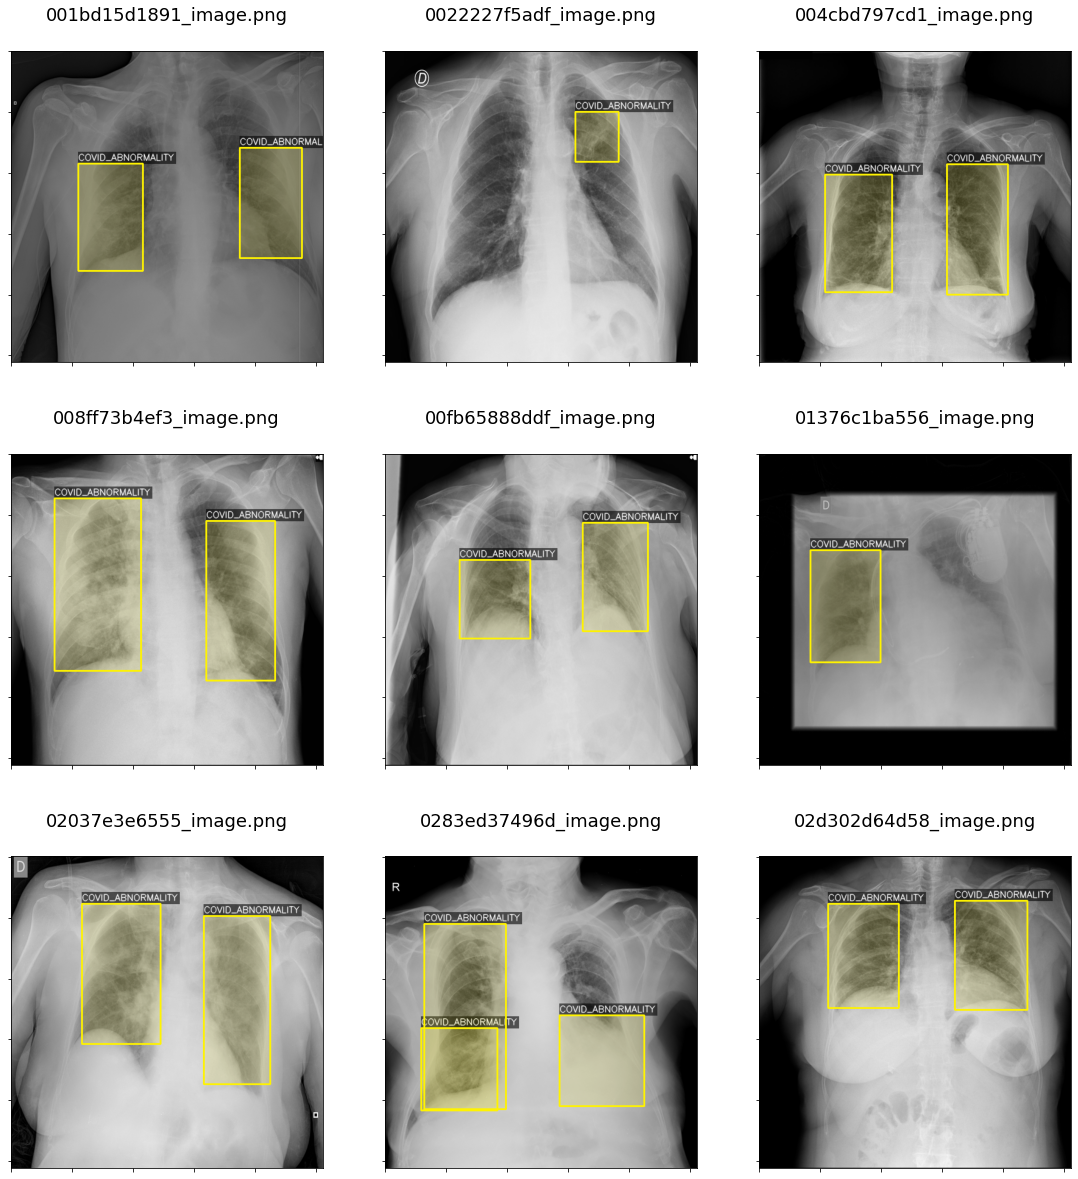

In [25]:
new_size = (512, 512)
imgs_path = "/kaggle/input/siim-covid19-512-images-and-metadata/train"
threshold = 0.45

fig, axes = plt.subplots(3,3, figsize=(19,21))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
axes = axes.ravel()

results_list = []

for idx, img_id in enumerate(imagepaths):
    img_path = os.path.join(imgs_path, img_id)
    img = cv2.imread(img_path)
    result = inference_detector(model, img_path)
    results_filtered = result[0][result[0][:, 4]>threshold]
    bboxes = results_filtered[:, :4]
    scores = results_filtered[:, 4] 
    results_list.append(result[0])
    
    for box in bboxes:
        img = draw_bbox(img, list(np.int_(box)), "Covid_Abnormality",
                        (255, 243, 0))

    axes[idx].imshow(img, cmap='gray')
    axes[idx].set_title(img_id, size=18, pad=30)
    axes[idx].set_xticklabels([])
    axes[idx].set_yticklabels([])

<span style="color: #E45D00; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Interactively Visualize & Analyze Output in Dashboard</span>

In [26]:
run = wandb.init(project=wnb_project_name,
                 name=f'images-{model_name}-fold{fold}-job{job}',
                 job_type='images')

class_id_to_label = {
    1: "pred_covid_abnormality",
    2: "GT_covid_abnormality"
}

wnb_images = []

for img_id, result in zip(imagepaths, results_list):
    
    bboxes = result[:, :4]
    scores = result[:, 4]
    ann_dict = {"predictions":{
                        "box_data":[],
                        "class_labels": class_id_to_label
                        },
                "ground_truth":{
                        "box_data":[],
                        "class_labels": class_id_to_label
                        }
                    }

    for box, score in zip(bboxes, scores):
        single_data = {
            # one box expressed in the default relative/fractional domain
            "position": {
                "minX": round(float(box[0])/512, 3),
                "maxX": round(float(box[2])/512, 3),
                "minY": round(float(box[1])/512, 3),
                "maxY": round(float(box[3])/512, 3),
            },
            "class_id" : 1,
            "box_caption": class_id_to_label[1],
            "scores" : {
                "confidence": float(score),
            }
        }
        ann_dict["predictions"]["box_data"].append(single_data)

    image_annotations = df_annotations[df_annotations.id==img_id.strip('.png')]

    for idxx, row in image_annotations[['xmin', 'ymin', 'xmax', 'ymax']].iterrows():
        single_data = {
            # one box expressed in the default relative/fractional domain
            "position": {
                "minX": round(float(row[0])/512, 3),
                "maxX": round(float(row[2])/512, 3),
                "minY": round(float(row[1])/512, 3),
                "maxY": round(float(row[3])/512, 3),
            },
            "class_id" : 2,
            "box_caption": class_id_to_label[2],
            "scores" : {
                "confidence": 1.0,
            }
        }
        ann_dict["ground_truth"]["box_data"].append(single_data)

    image = cv2.imread(os.path.join(imgs_path, img_id))
    wnb_images.append(wandb.Image(image, boxes=ann_dict))
    
wandb.log({f'images-{model_name}-fold{fold}-job{job}': wnb_images})

run.finish()
run

/opt/conda/lib/python3.7/site-packages/wandb/sdk/data_types.py:1243: ResourceWarning: unclosed file <_io.BufferedWriter name='/tmp/tmp915q4ciswandb-media/3hrghisv.boxes2D.json'>
  self._val, codecs.open(tmp_path, "w", encoding="utf-8")
/opt/conda/lib/python3.7/site-packages/wandb/sdk/data_types.py:1243: ResourceWarning: unclosed file <_io.BufferedWriter name='/tmp/tmp915q4ciswandb-media/2j87o7j8.boxes2D.json'>
  self._val, codecs.open(tmp_path, "w", encoding="utf-8")
/opt/conda/lib/python3.7/site-packages/wandb/sdk/data_types.py:1243: ResourceWarning: unclosed file <_io.BufferedWriter name='/tmp/tmp915q4ciswandb-media/37446wx7.boxes2D.json'>
  self._val, codecs.open(tmp_path, "w", encoding="utf-8")
/opt/conda/lib/python3.7/site-packages/wandb/sdk/data_types.py:1243: ResourceWarning: unclosed file <_io.BufferedWriter name='/tmp/tmp915q4ciswandb-media/3e0vqagc.boxes2D.json'>
  self._val, codecs.open(tmp_path, "w", encoding="utf-8")
/opt/conda/lib/python3.7/site-packages/wandb/sdk/data_ty

_runtime,7
_timestamp,1626877970
_step,0


_runtime,▁
_timestamp,▁
_step,▁


In [27]:
!rm -rf mmdetection/

<span style="color: #E45D00; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Additional Resources</span>

&nbsp;&nbsp;🔖&nbsp;&nbsp;[MMDetection Documentation](https://mmdetection.readthedocs.io/en/latest/)

&nbsp;&nbsp;🔖&nbsp;&nbsp;[MDetection Github Repository](https://github.com/open-mmlab/mmdetection)

&nbsp;&nbsp;🔖&nbsp;&nbsp;[Weights & Biases Documentation](https://docs.wandb.ai/)

&nbsp;&nbsp;🔖&nbsp;&nbsp;[Weights & Biases Github Repository](https://github.com/wandb/examples)
